<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/bagging_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import seaborn as sns

In [5]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
#for binary
df= iris_df[iris_df['target']!=0][['sepal length (cm)','petal length (cm)', 'target']]

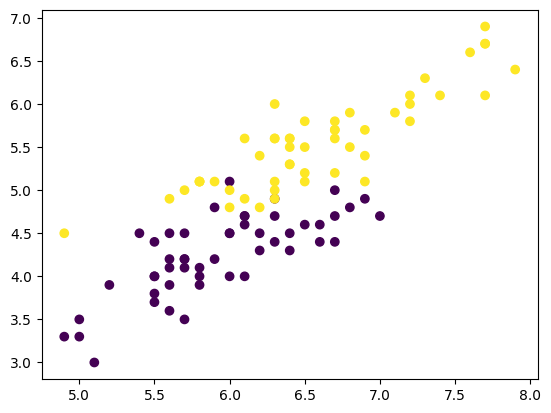

In [7]:
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['target'])
plt.show()

In [8]:
df= df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val   = df.iloc[60:80,:].sample(5)

df_test  = df.iloc[80:, :].sample(5)

In [9]:
from sklearn.ensemble import BaggingClassifier

In [10]:
#testing
x_test= df_val.drop('target', axis=1).values
y_test= df_val['target'].values

In [11]:
#training
x_train= df_train.drop('target', axis=1).values
y_train= df_train['target'].values

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [13]:
dt_class1= DecisionTreeClassifier()


In [14]:
def evaluate(clf, x,y):

  clf.fit(x,y)
  plot_tree(clf)
  plt.show()

  plot_decision_regions(x, y, clf=clf)

  y_pred= clf.predict(x_test)

  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

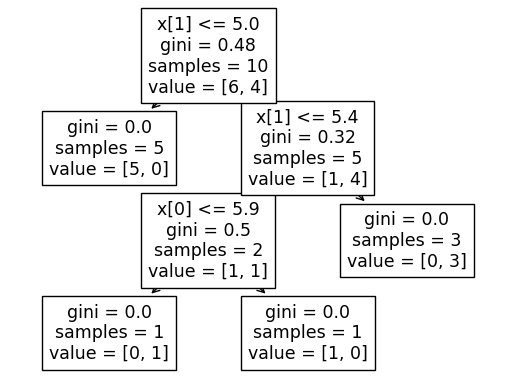

Accuracy: 0.8


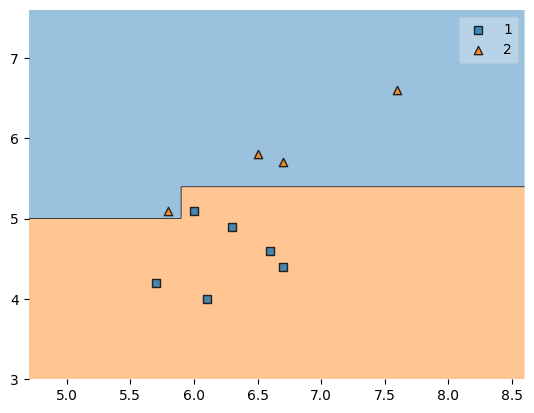

In [15]:
evaluate(dt_class1,x_train,y_train)

In [25]:
bag= BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                       max_samples=0.5,bootstrap=False)
bag.fit(x_train, y_train)
#print(bag.oob_score_)
print(bag.score(x_test, y_test))


0.8


In [26]:
params= {
    "n_estimators":[100, 500, 1000],
    "max_samples":[0.1, 0.25, 0.5],
    "bootstrap":[True, False],
         "bootstrap_features":[True, False],
         "oob_score":[True, False]

         }

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
svc= SVC()
rf= RandomForestClassifier()
Bc= BaggingClassifier
dt= DecisionTreeClassifier()

In [29]:
grid1= GridSearchCV(Bc(base_estimator=rf), params, cv=3, n_jobs=-1)
grid1.fit(x_train, y_train)
print(grid1.best_params_)
print(grid1.best_score_)



KeyboardInterrupt: 

In [ ]:
grid2= GridSearchCV(Bc(base_estimator=svc), params, cv=3, n_jobs=-1)
grid2.fit(x_train, y_train)
print(grid2.best_params_)
print(grid2.best_score_)

In [1]:
grid3= GridSearchCV(Bc(base_estimator=rf), params, cv=3, n_jobs=-1)
grid3.fit(x_train, y_train)
print(grid3.best_params_)
print(grid3.best_score_)

NameError: name 'GridSearchCV' is not defined